In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context("paper", font_scale=1.5)

In [2]:
torino = pd.read_csv('ibm_torino_calibrations_2025-08-15T08_32_54Z.csv')

In [3]:
torino.head()

,Qubit,T1 (us),T2 (us),Readout assignment error,Prob meas0 prep1,Prob meas1 prep0,Readout length (ns),ID error,Single-qubit gate length (ns),RX error,Z-axis rotation (rz) error,√x (sx) error,Pauli-X error,CZ error,Gate length (ns),Operational,RZZ error
0,0,159.026765,246.863483,0.135498,0.138184,0.106934,1560,0.000119,32,0.000119,0,0.000119,0.000119,15:0.0028073391158400796;1:0.0035005715477738897,15:68;1:68,Yes,NaN
1,1,230.560707,179.265872,0.062866,0.046387,0.072754,1560,0.000151,32,0.000151,0,0.000151,0.000151,2:0.0029210695275398435;0:0.0035005715477738897,2:68;0:68,Yes,2:0.004409737981508927
2,2,160.924898,141.157615,0.080566,0.081543,0.035645,1560,0.000318,32,0.000318,0,0.000318,0.000318,1:0.0029210695275398435;3:0.0021697658819153087,1:68;3:68,Yes,1:0.004409737981508927;3:0.004422985746359381
3,3,230.917285,173.931922,0.024292,0.026855,0.013184,1560,0.000151,32,0.000151,0,0.000151,0.000151,2:0.0021697658819153087;4:0.0022061352910527077,2:68;4:68,Yes,2:0.004422985746359381;4:0.00255772777553287
4,4,148.873355,170.253619,0.033936,0.043457,0.024414,1560,0.000171,32,0.000171,0,0.000171,0.000171,3:0.0022061352910527077;5:0.007709604988002855...,3:68;5:68;16:80,Yes,3:0.00255772777553287;5:0.05335282050072909;16...


In [4]:
# use regex to parse a str to two float values: e.g., '15:0.0028073391158400796;1:0.0035005715477738897' -> 
import re 

def error_str_to_float(s):
    matches = re.findall(r'(\d+):(\d+\.\d+)', s)
    values = tuple(float(m[1]) for m in matches)
    return values

In [5]:
cz_errors = torino['CZ error'].astype(str)
cz_errors = [error_str_to_float(s) for s in cz_errors]
rzz_errors = torino['RZZ error'].astype(str)
rzz_errors = [error_str_to_float(s) for s in rzz_errors]

In [6]:
from itertools import chain
cz_errors_flatten = list(chain.from_iterable(cz_errors))
rzz_errors_flatten = list(chain.from_iterable(rzz_errors))

In [23]:
from scipy.stats import gmean

print('CZ error mean:', np.mean(cz_errors_flatten))
print('RZZ error mean:', np.mean(rzz_errors_flatten))
print('CZ error geometric mean:', gmean(cz_errors_flatten))
print('RZZ error geometric mean:', gmean(rzz_errors_flatten))

CZ error mean: 0.007707733275756401
RZZ error mean: 0.010671270195819978
CZ error geometric mean: 0.0038619097667784456
RZZ error geometric mean: 0.0057709223847097575


In [47]:
error_comparison = [[], []]
for cz_error, rzz_error in zip(cz_errors, rzz_errors):
    if len(cz_error) != len(rzz_error):
        continue
    error_comparison[0].extend(cz_error)
    error_comparison[1].extend(rzz_error)

error_comparison = np.array(error_comparison)

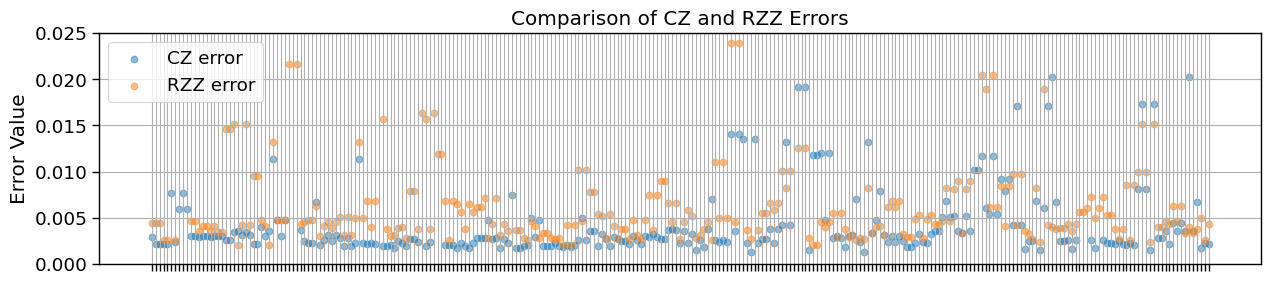

In [46]:
# plot scatter figure to compare error_comparison[0] and error_comparison[1]
plt.figure(figsize=(15, 3))
plt.scatter(range(len(error_comparison[0])), error_comparison[0], label='CZ error', alpha=0.5)
plt.scatter(range(len(error_comparison[1])), error_comparison[1], label='RZZ error', alpha=0.5)
plt.xlabel(None)
plt.ylabel("Error Value")
plt.title("Comparison of CZ and RZZ Errors")
plt.ylim(0, 0.025)
plt.xticks(range(len(error_comparison[0])), [])
plt.legend()
plt.grid()
plt.show()

In [50]:
gmean(error_comparison[1] / error_comparison[0])

1.4854644535189923

In [59]:
cz_error_mean = np.mean(cz_errors_flatten)
rzz_error_mean = np.mean(rzz_errors_flatten)

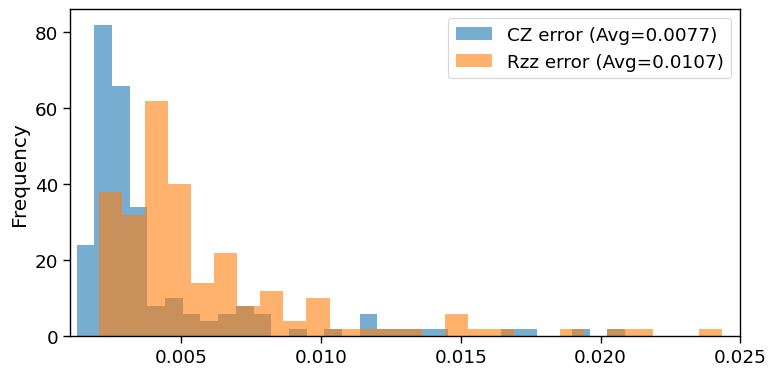

In [64]:
plt.figure(figsize=(8, 4))
plt.hist(cz_errors_flatten, bins=300, alpha=0.6, label='CZ error (Avg={:.4f})'.format(cz_error_mean))
plt.hist(rzz_errors_flatten, bins=300, alpha=0.6, label='Rzz error (Avg={:.4f})'.format(rzz_error_mean))
plt.legend()
plt.xlim(0.001, 0.025)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/Users/anan/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 8 x 4 in image.
/Users/anan/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: heron_error.pdf
/Users/anan/miniconda3/lib/python3.12/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_bin : Removed 36 rows containing non-finite values.
/Users/anan/miniconda3/lib/python3.12/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.
/Users/anan/miniconda3/lib/python3.12/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_bin : Removed 36 rows containing non-finite values.
/Users/anan/miniconda3/lib/python3.12/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.


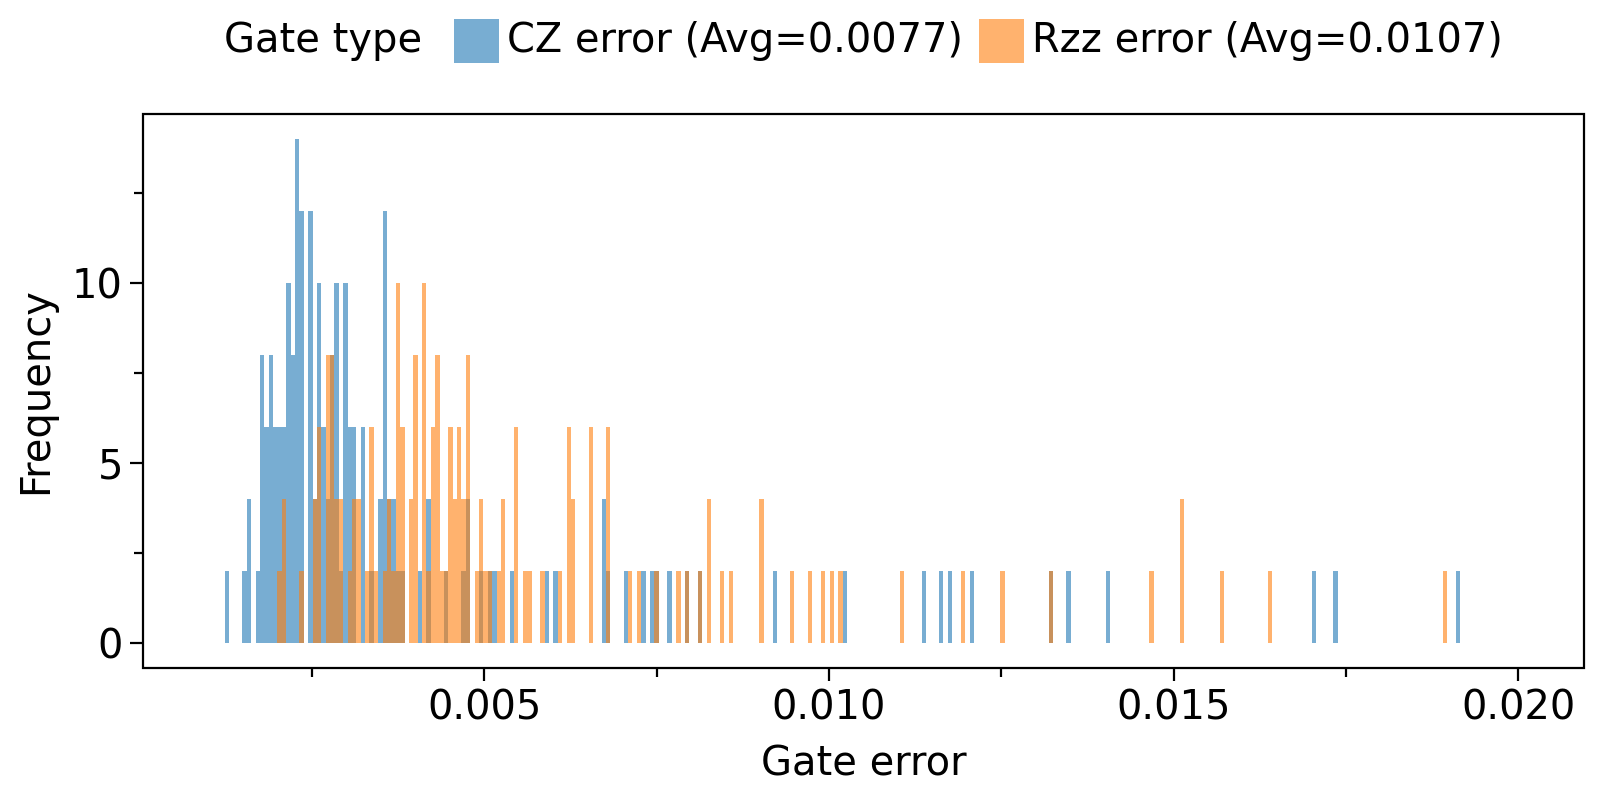

In [83]:
import pandas as pd
import numpy as np
from plotnine import *

# --- 2. 将数据转换为 plotnine 适用的 DataFrame ---
# 创建包含误差类型和值的 DataFrame
cz_df = pd.DataFrame({
    'Gate error': cz_errors_flatten,
    'Gate type': 'CZ'
})
rzz_df = pd.DataFrame({
    'Gate error': rzz_errors_flatten,
    'Gate type': 'Rzz'
})

# 合并两个 DataFrame
df_errors = pd.concat([cz_df, rzz_df], ignore_index=True)


# --- 3. 使用 plotnine 绘图 ---
# 创建图例标签，包含计算好的平均值
legend_labels = {
    'CZ': f'CZ error (Avg={cz_error_mean:.4f})',
    'Rzz': f'Rzz error (Avg={rzz_error_mean:.4f})'
}

# 定义颜色以便与 matplotlib 默认颜色匹配
# Matplotlib 默认颜色: C0 (blue), C1 (orange)
colors = {
    'CZ': '#1f77b4',
    'Rzz': '#ff7f0e'
}


# 构建图形
p = (
    ggplot(df_errors, aes(x='Gate error', fill='Gate type'))
    # 绘制直方图
    + geom_histogram(bins=300, alpha=0.6, position='identity')
    
    # 手动设置图例标签和填充颜色
    + scale_fill_manual(
        name='', # 不显示图例标题
        values=colors,
        labels=lambda types: [legend_labels[t] for t in types]
    )
    
    # 设置 x 轴范围和 y 轴标签
    + xlim(0.001, 0.02)
    + ylab('Frequency')
    
    # 设置主题和图形大小
    + theme_matplotlib()
    + theme(
        figure_size=(8, 4),
        legend_position='top',
    )
)

# 显示图形
p.save('heron_error.pdf')

p




In [73]:
np.min(rzz_errors_flatten)

0.0020389545720642943